In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [18]:
titanic=pd.read_csv('train.csv')

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#QUES 1-- Who were the passengers on the Titanic? (Ages,Gender,Class,.... etc)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

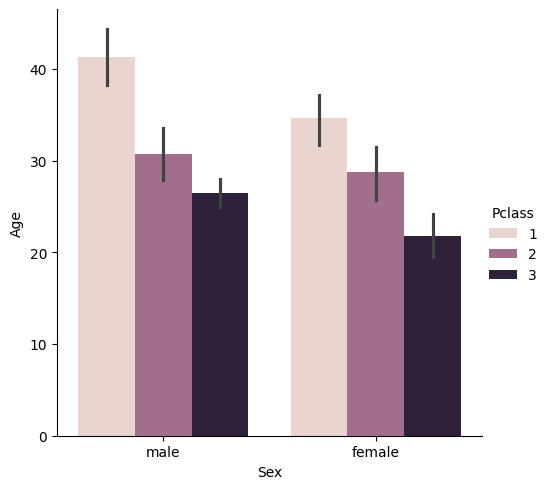

In [25]:
sns.catplot(x='Sex', y='Age', hue='Pclass', data=titanic,kind='bar')

In [26]:
def male_female_child(passenger):
    age,sex=passenger

    if age<16:
        return 'child'
    else:
        return sex

In [28]:
titanic['person']=titanic[['Age','Sex']].apply(male_female_child,axis=1)

In [29]:
titanic[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


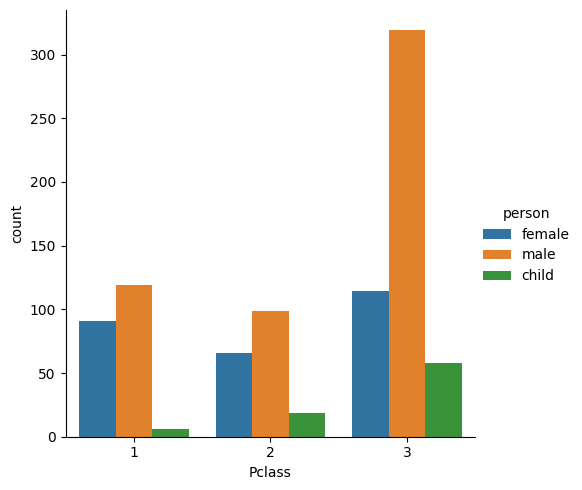

In [34]:
sns.catplot(x='Pclass',data=titanic,hue='person',kind='count')

<Axes: >

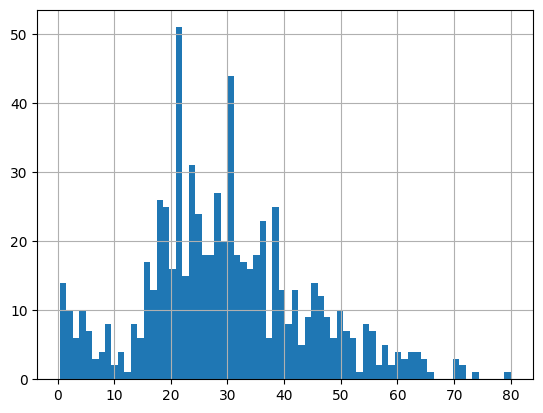

In [35]:
titanic['Age'].hist(bins=70)

In [36]:
titanic['Age'].mean()

np.float64(29.69911764705882)

In [39]:
titanic['person'].value_counts()

person
male      537
female    271
child      83
Name: count, dtype: int64

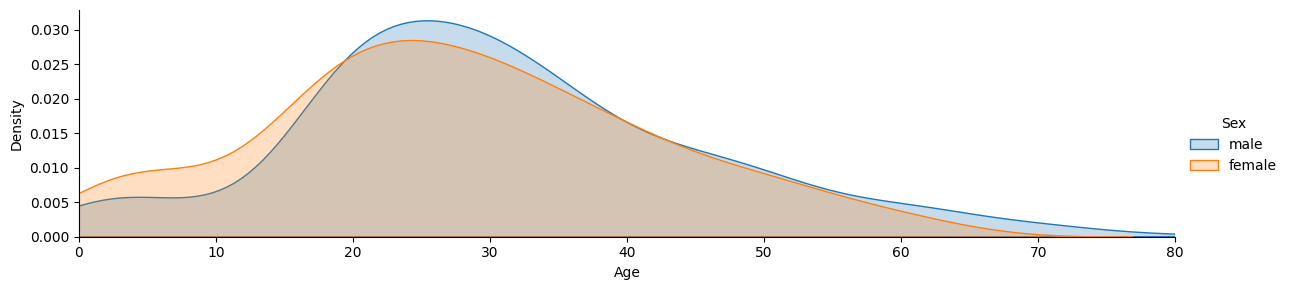

In [43]:
fig =sns.FacetGrid(titanic,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)

oldest = titanic['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

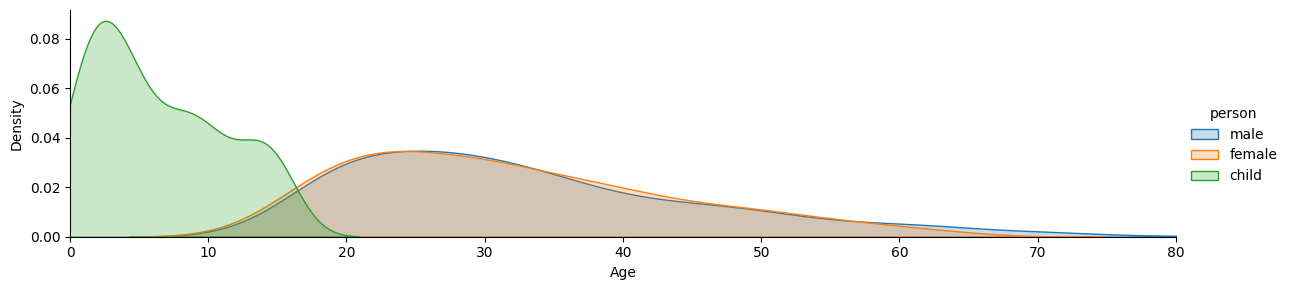

In [44]:
fig =sns.FacetGrid(titanic,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)

oldest = titanic['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

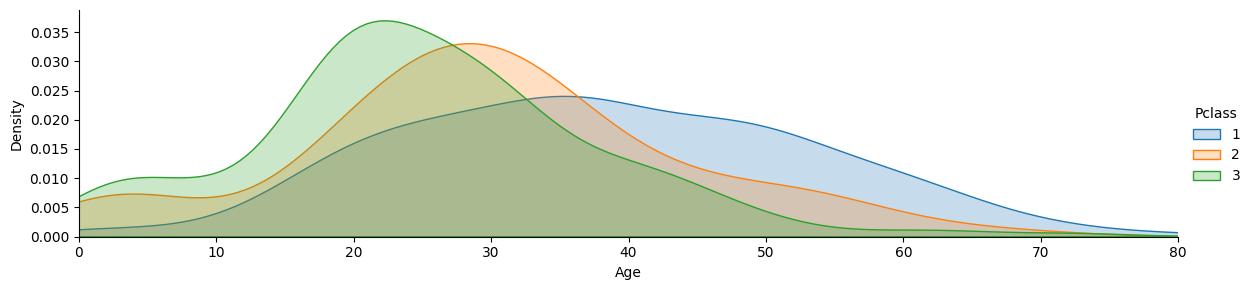

In [45]:
fig =sns.FacetGrid(titanic,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)

oldest = titanic['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [46]:
#Ques 2-- What deck were passengers on and how does that relate to their class?

In [47]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [48]:
deck = titanic['Cabin'].dropna()

In [49]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

C:\Users\DELL\AppData\Local\Temp\ipykernel_11800\3143689333.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Cabin", data=cabin_df, palette="winter_d", kind="count", order=sorted_cabin_letters)


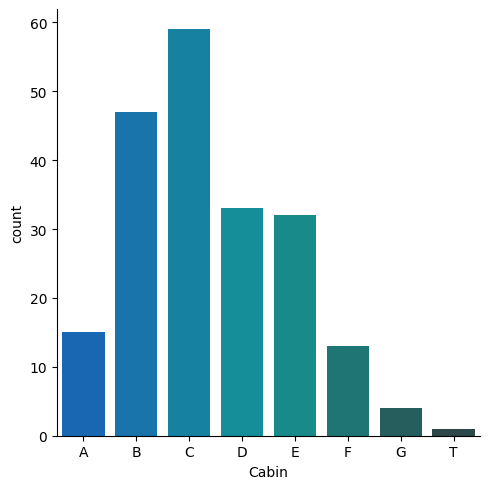

In [64]:
levels=[]

for level in deck:
    levels.append(level[0])

cabin_df= DataFrame(levels)
cabin_df.columns = ['Cabin']

cabin_df["Cabin_Letter"] = cabin_df["Cabin"].astype(str).str[0]

# Get sorted unique letters
sorted_cabin_letters = sorted(cabin_df["Cabin_Letter"].unique())

# Plot with sorted order
sns.catplot(x="Cabin", data=cabin_df, palette="winter_d", kind="count", order=sorted_cabin_letters)



C:\Users\DELL\AppData\Local\Temp\ipykernel_11800\1319260496.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Cabin',data=cabin_df,palette='summer',kind='count',order=sorted_cabin_letters)


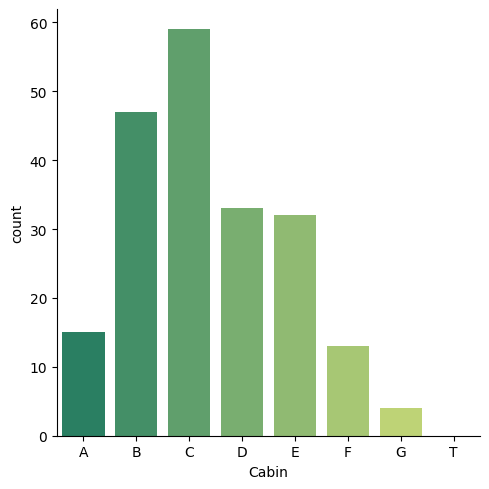

In [66]:
cabin_df=cabin_df[cabin_df.Cabin !="T"]
sns.catplot(x='Cabin',data=cabin_df,palette='summer',kind='count',order=sorted_cabin_letters)

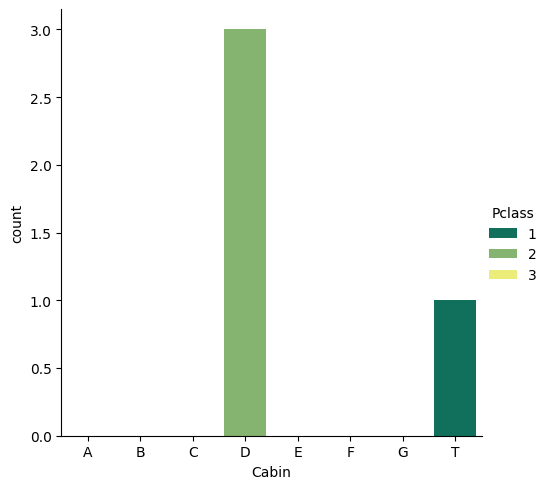

In [74]:
sns.catplot(x='Cabin',hue='Pclass',data=titanic,palette='summer',kind='count',order=sorted_cabin_letters)

In [75]:
#Ques 3-- Where did the passengers ccome from?

In [76]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


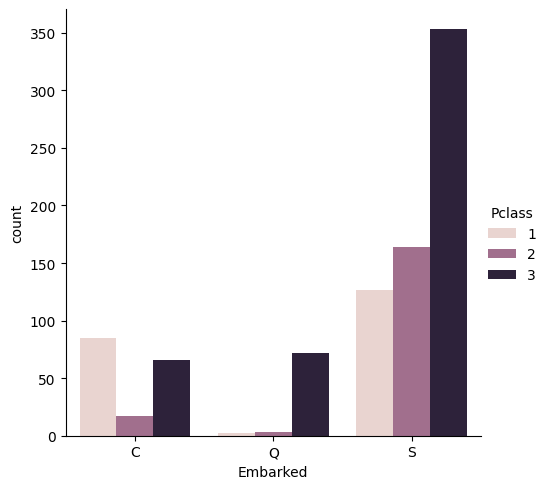

In [79]:
sns.catplot(x='Embarked',data=titanic,hue='Pclass',kind='count',order=['C','Q','S'])

In [80]:
#Ques 4-- Who was alone and who was with their family?

In [81]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [82]:
titanic['Alone']=titanic.SibSp + titanic.Parch

In [83]:
titanic['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [84]:
titanic['Alone'].loc[titanic['Alone']>0]= 'With Family'
titanic['Alone'].loc[titanic['Alone']==0]= 'Alone'

C:\Users\DELL\AppData\Local\Temp\ipykernel_11800\698923797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Alone'].loc[titanic['Alone']>0]= 'With Family'
C:\Users\DELL\AppData\Local\Temp\ipykernel_11800\698923797.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'With Family' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  titanic['Alone'].loc[titanic['Alone']>0]= 'With Family'


In [85]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


C:\Users\DELL\AppData\Local\Temp\ipykernel_11800\2766833466.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Alone',data=titanic,palette='Blues',kind='count')


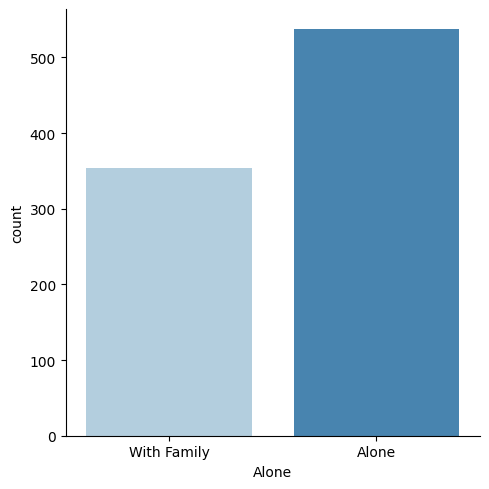

In [86]:
sns.catplot(x='Alone',data=titanic,palette='Blues',kind='count')

In [87]:
#Ques 5-- Wha factors helped someone survive the sinking or crash of the Titanic?

C:\Users\DELL\AppData\Local\Temp\ipykernel_11800\2170086711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Survivor',data=titanic,palette='Set1',kind='count')


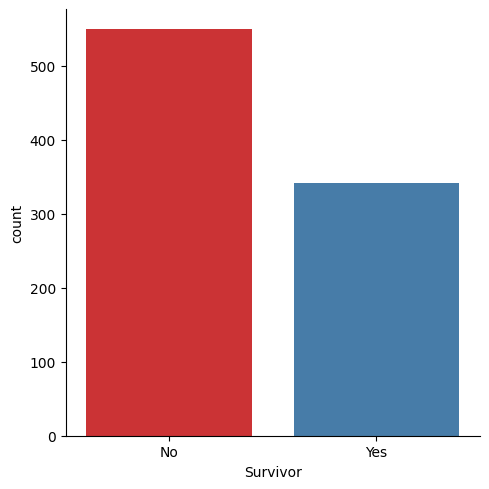

In [89]:
titanic['Survivor']=titanic.Survived.map({0:'No',1:'Yes'})

sns.catplot(x='Survivor',data=titanic,palette='Set1',kind='count')

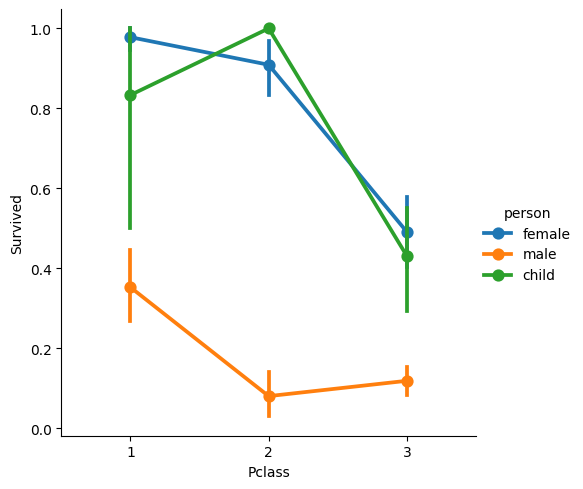

In [95]:
sns.catplot(x='Pclass',y='Survived',hue='person',data=titanic,kind='point')

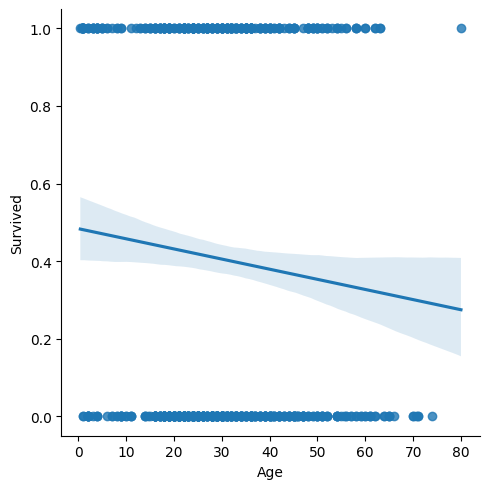

In [97]:
sns.lmplot(x='Age',y='Survived',data=titanic)

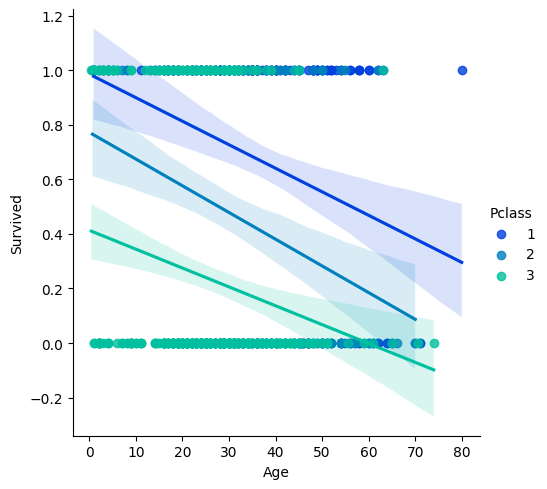

In [98]:
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic,palette='winter')

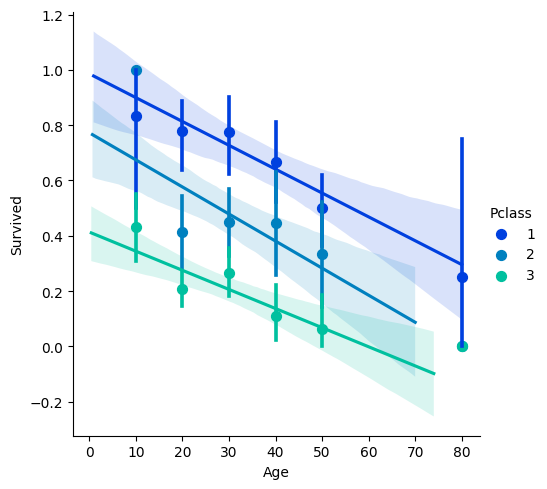

In [100]:
generations= [10,20,30,40,50,80]

sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic,palette='winter',x_bins=generations)

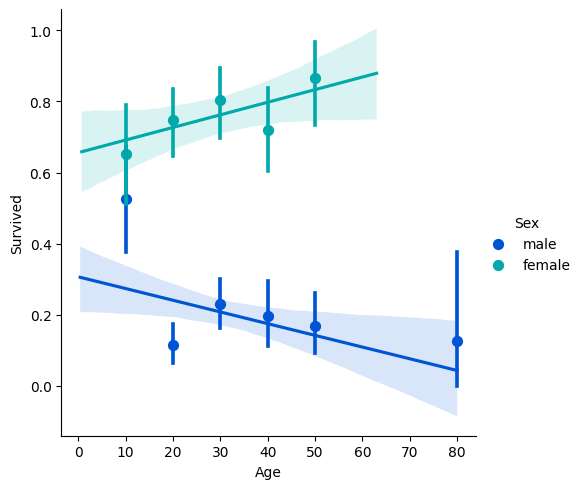

In [104]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic,palette='winter',x_bins=generations)